In [1]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 10, 7
import warnings
warnings.filterwarnings('ignore')

In [2]:
full_data = pd.read_csv('cc_ohlcv_by_exchange_landing_202109130813.csv')
full_data['date'] = pd.to_datetime(full_data['date'])
clean_data = full_data.dropna()
#clean_data.info()
print("Dataset contains information from", clean_data['date'].min(), "till", clean_data['date'].max())
print("Length of the time series is", clean_data['date'].max()-clean_data['date'].min())

Dataset contains information from 2018-12-10 00:00:00 till 2021-09-12 00:00:00
Length of the time series is 1007 days 00:00:00


In [16]:
clean_data.head()

,id,created_at,open,high,low,price,volume,amount,symbol,exchange,timestamp,date,year
1,737217,2021-09-12 07:52:12,0.03650,0.03710,0.03490,0.03600,44107.49,1225208.056,lrc-usdt,okex,1544400000000,2018-12-10,2018
12,723203,2021-09-12 07:48:56,14.50000,14.52000,12.00000,12.19000,85498.33,7013.809,gno-usd,kraken,1544400000000,2018-12-10,2018
21,730210,2021-09-12 07:51:14,0.03352,0.03352,0.03352,0.03352,0.00,0.000,lrc-usd,bitfinex,1544400000000,2018-12-10,2018
26,750230,2021-09-12 07:55:36,0.32850,0.33200,0.30350,0.31000,646292.56,2084814.710,zrx-usd,coinbase,1544400000000,2018-12-10,2018
35,759239,2021-09-12 07:56:40,0.32900,0.33210,0.30650,0.31180,76289.25,244673.669,zrx-usdt,okex,1544400000000,2018-12-10,2018


In [17]:
clean_data['symbol'].value_counts()

btc-usd      11562
eth-usd       9430
ltc-usd       7911
btc-usdt      7832
eth-usdt      7831
             ...  
ray-usdt        34
orn-usd         33
chsb-usd        20
chsb-usdt       20
gno-usdt        14
Name: symbol, Length: 202, dtype: int64

In [20]:
btc_data = clean_data[clean_data['symbol'] == 'btc-usd' ]
btc_data.head(20)

,id,created_at,open,high,low,price,volume,amount,symbol,exchange,timestamp,date,year
759,83130,2021-09-12 03:42:03,1861.80,1861.80,1861.80,1861.80,0.00,0.000,btc-usd,huobi,1544400000000,2018-12-10,2018
761,82129,2021-09-12 03:42:01,3529.75,3588.43,3355.00,3408.00,35762233.99,10493.613,btc-usd,bitstamp,1544400000000,2018-12-10,2018
763,87134,2021-09-12 03:42:15,3532.00,3587.13,3354.56,3413.83,18620951.93,5454.563,btc-usd,itbit,1544400000000,2018-12-10,2018
765,86133,2021-09-12 03:42:11,3546.31,3597.20,3412.90,3424.52,161499.94,47.160,btc-usd,bitflyer,1544400000000,2018-12-10,2018
767,79126,2021-09-12 03:41:53,3531.18,3590.71,3354.97,3410.15,44649594.52,13093.147,btc-usd,coinbase,1544400000000,2018-12-10,2018
768,89136,2021-09-12 03:42:22,6340.00,6340.00,6340.00,6340.00,0.00,0.000,btc-usd,poloniex,1544400000000,2018-12-10,2018
769,90137,2021-09-12 03:42:27,3529.25,3586.64,3354.34,3414.45,3484448.25,1020.501,btc-usd,bittrex,1544400000000,2018-12-10,2018
772,88135,2021-09-12 03:42:19,3529.66,3591.53,3357.56,3411.60,17059119.16,5000.328,btc-usd,gemini,1544400000000,2018-12-10,2018
773,81128,2021-09-12 03:41:58,3642.30,3709.70,3475.80,3524.80,80447395.98,22823.251,btc-usd,bitfinex,1544400000000,2018-12-10,2018
778,80127,2021-09-12 03:41:55,3539.50,3596.00,3348.70,3408.00,28491342.57,8360.136,btc-usd,kraken,1544400000000,2018-12-10,2018


In [3]:
exchanges = clean_data['exchange'].unique()
number_of_exchanges = clean_data['exchange'].nunique()
symbols = clean_data['symbol'].unique()
number_of_symbols = clean_data['symbol'].nunique()

print('The dataset contains information from', number_of_exchanges,'exchanges')
print('Total number of cryptocurrencies', number_of_symbols)


The dataset contains information from 15 exchanges
Total number of cryptocurrencies 202


Index(['id', 'created_at', 'open', 'high', 'low', 'price', 'volume', 'amount',
       'symbol', 'exchange', 'timestamp', 'date'],
      dtype='object')

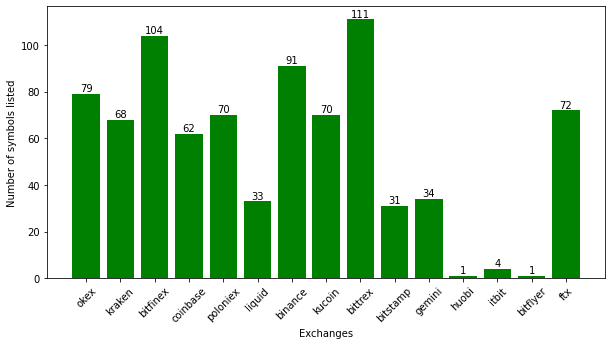

In [4]:
# Number of cryptocurrencies listed in each exchanges
exchanges_symbols = np.empty(number_of_exchanges)

for i, exchange in enumerate(exchanges):
    n = clean_data[clean_data['exchange']==exchange]['symbol'].nunique()
    exchanges_symbols[i] = n
plt.figure(figsize=(10,5))
plt.bar(exchanges, exchanges_symbols, color = 'green') 
plt.xticks(rotation = 45)
plt.xlabel('Exchanges')
plt.ylabel('Number of symbols listed')
for exchange, n in zip(exchanges, exchanges_symbols):
    plt.text(exchange, n+1, str(int(n)), ha = 'center')
    
clean_data.keys()

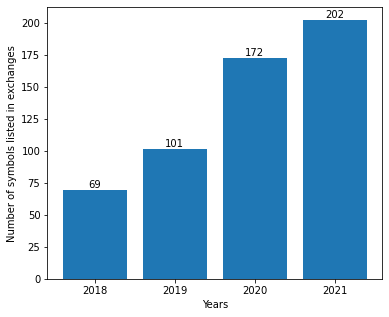

In [5]:
# Find the cryptocurrencies traded in each year
clean_data['year'] = pd.DatetimeIndex(clean_data['date']).year
years = [2018, 2019, 2020, 2021]
nsymbols = []
plt.figure(figsize=(6,5))
for year in years:
    temp = clean_data[clean_data['year'] == year]['symbol'].nunique()
    nsymbols.append(temp)
    plt.text(year, temp+2, str(temp), ha = 'center')

plt.bar(years, nsymbols)
plt.ylabel('Number of symbols listed in exchanges')
plt.xlabel('Years')
plt.xticks(years);

In [6]:
volume_traded_each_day = clean_data.groupby(['date', 'exchange'])["volume"].mean()
volume_traded_each_day = volume_traded_each_day.reset_index()
print(volume_traded_each_day)
print(volume_traded_each_day['volume'].min())
print(volume_traded_each_day['volume'].max())

            date  exchange        volume
0     2018-12-10   binance  1.341603e+07
1     2018-12-10  bitfinex  6.758981e+06
2     2018-12-10  bitflyer  1.614999e+05
3     2018-12-10  bitstamp  9.782574e+06
4     2018-12-10   bittrex  3.183409e+05
...          ...       ...           ...
14581 2021-09-12    kraken  1.142161e+06
14582 2021-09-12    kucoin  6.065720e+05
14583 2021-09-12    liquid  3.327992e+04
14584 2021-09-12      okex  2.074543e+07
14585 2021-09-12  poloniex  2.106026e+05

[14586 rows x 3 columns]
0.0
835403999.1365116


In [7]:
x = clean_data.loc[clean_data['exchange'] == 'binance']
y = x.loc[x['date'] == '2018-12-10']
y['volume'].mean()

13416029.502105264

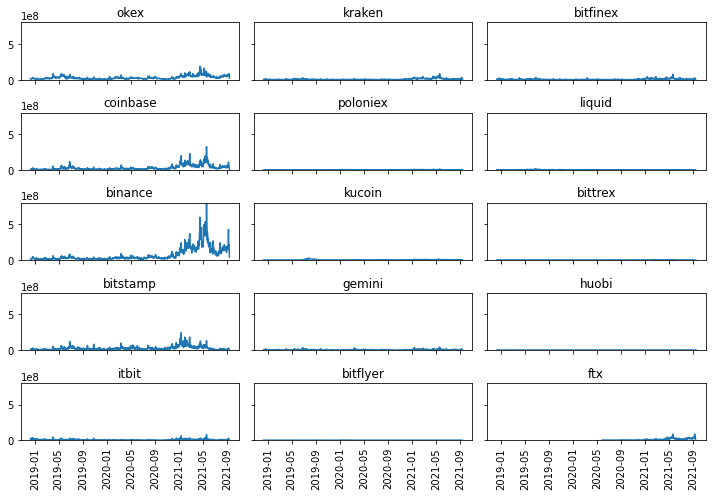

In [8]:
fig, axes = plt.subplots(nrows=5, ncols=3, sharex='col', sharey='row')
for ax, exchange in zip(axes.flatten(), exchanges):
  subt = volume_traded_each_day[volume_traded_each_day['exchange'] == exchange]  
  ax.plot(subt['date'],subt['volume'], label = exchange)
  ax.tick_params(axis = 'x', labelrotation = 90)
  ax.set_ylim(0, 805405999.1365116)
  ax.set_title(exchange)

plt.tight_layout()

In [9]:
volume_total = clean_data.groupby(['date'])["volume"].sum()
volume_total = volume_total.reset_index()
volume_by_market = clean_data.groupby(['date', 'exchange'])["volume"].sum()
volume_by_market = volume_by_market.reset_index()
volume_by_market['volume_in_percentage'] = np.empty(volume_by_market['volume'].shape)

for index, row in volume_by_market.iterrows():
    tv = volume_total[volume_total['date'] == row['date']]['volume']
    volume_by_market.at[index,'volume_in_percentage'] = (row['volume']/tv)*100


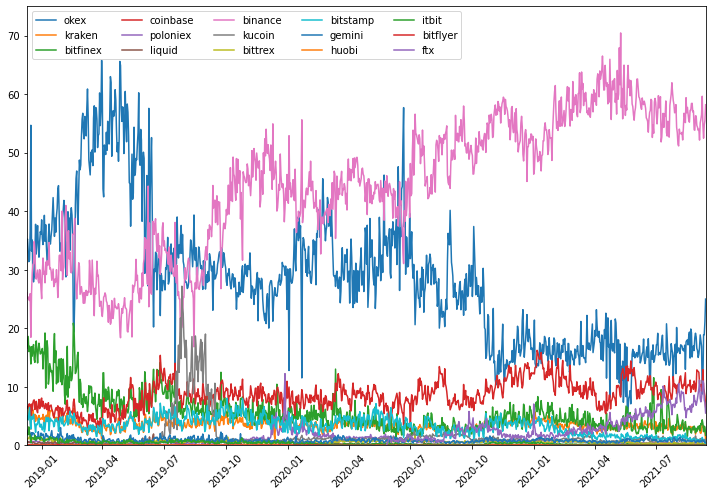

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex='col', sharey='row')

for exchange in exchanges:
  subt = volume_by_market[volume_by_market['exchange'] == exchange]  
  ax.plot(subt['date'],subt['volume_in_percentage'], label = exchange)
  ax.tick_params(axis = 'x', labelrotation = 45)

plt.legend(loc = 2, ncol = 5)
plt.xlim(clean_data['date'].min(), clean_data['date'].max())
plt.ylim(0, 75)
plt.tight_layout()

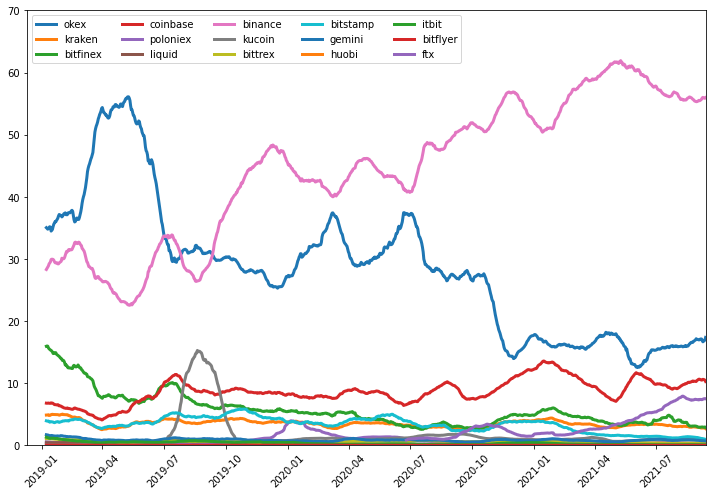

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex='col', sharey='row')

for exchange in exchanges:
  subt = volume_by_market[volume_by_market['exchange'] == exchange]  
  subt = subt.set_index(['date'])
  rolmean = subt['volume_in_percentage'].rolling(window=30).mean()
  ax.plot(rolmean, label=exchange, lw = 3)
       

ax.tick_params(axis = 'x', labelrotation = 45)
plt.xlim(clean_data['date'].min(), clean_data['date'].max())
plt.ylim(0, 70)
plt.legend(loc = 2, ncol = 5)
plt.tight_layout()

In [12]:
x = np.array([2, 3, 4])
y = x * 2
y

array([4, 6, 8])

[2018, 2019, 2020, 2021]
2018
2018
   exchanges    volumes
0       okex  33.614946
1    binance  28.813305
2   bitfinex  16.276548
3   coinbase   6.843274
4     kraken   4.956348
15    Others   9.495579
2019
2019
   exchanges    volumes
0       okex  37.080630
1    binance  31.637991
2   coinbase   8.420666
3   bitfinex   8.252496
4   bitstamp   4.429203
15    Others  10.179015
2020
2020
   exchanges    volumes
0    binance  48.760579
1       okex  24.847786
2   coinbase   9.637540
3   bitfinex   4.470789
4   bitstamp   3.598514
15    Others   8.684792
2021
2021
   exchanges    volumes
0    binance  58.102915
1       okex  15.316059
2   coinbase  10.360739
3        ftx   4.343764
4   bitfinex   4.018985
15    Others   7.857537


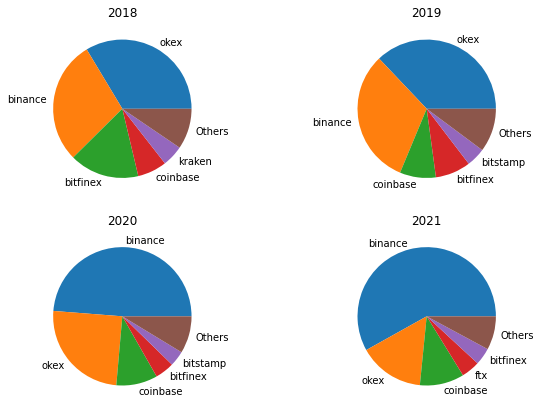

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)#, sharex='col', sharey='row')
print(years)
for ax, year in zip(axes.flatten(),years):
    volumes = []
    print(year)
    for exchange in exchanges:
        temp = clean_data[clean_data['exchange'] == exchange]
        temp = temp[temp['year'] == year]
        total = temp['volume'].sum()
        volumes.append(total)
    volumes = (np.array(volumes)*100)/np.array(volumes).sum()
    x = {'exchanges':exchanges, 'volumes':volumes}
    test = pd.DataFrame(data=x)
    test = test.sort_values('volumes', ascending=False)
    test = test.append({'exchanges':'Others', 'volumes':test['volumes'][5:].sum()}, ignore_index=True) 
    test = test.iloc[[0,1,2,3,4,-1]]
    print(year)
    print(test)
    ax.pie(test.volumes, labels=test.exchanges)
    ax.set_title(str(year))

In [14]:
axes


array([[<AxesSubplot:title={'center':'2018'}>,
        <AxesSubplot:title={'center':'2019'}>],
       [<AxesSubplot:title={'center':'2020'}>,
        <AxesSubplot:title={'center':'2021'}>]], dtype=object)

In [15]:
x = {'exchange':exchanges, 'volumes':volumes}
test = pd.DataFrame(data=x)
test = test.sort_values('volumes', ascending=False)
test = test.append({'exchange':'Others', 'volumes':test['volumes'][5:].sum()}, ignore_index=True) 
test = test.iloc[[0,1,2,3,4,-1]]
test
names = test.exchange
type(names)

pandas.core.series.Series

## How does price of BTC change over time
- Filter out BTC from data
- Plot BTC price over time by stock exchange
- Plot daily/week BTC change over time
- Filter out non-active exchanges when volume != 0 
- Arbitrage over exchnges
- change in price over bitcoins